In [36]:
import pandas as pd
import datetime
import numpy as np
import matplotlib as mpl           # 그래프를 그리는 패키지
import matplotlib.pyplot as plt    # 그래프를 그리는 패키지
from matplotlib import font_manager,rc
import pykrx
import seaborn as sns
from pykrx import stock

In [42]:
#폰트 경로
font_path = "C:/Windows/Fonts/gulim.ttc"
 
#폰트 이름 얻어오기
font_name = font_manager.FontProperties(fname=font_path).get_name()

In [10]:
kospi_df = stock.get_index_ohlcv_by_date("20181101", "20201102", "1001")
kospi_df = kospi_df.reset_index(drop = False)
kospi_df = kospi_df.iloc[:,[0,4]]
kospi_df.columns = ['Date', 'KOSPI']
kospi_df

,Date,KOSPI
0,2018-11-01,2024.46
1,2018-11-02,2096.00
2,2018-11-05,2076.92
3,2018-11-06,2089.62
4,2018-11-07,2078.69
...,...,...
489,2020-10-27,2330.84
490,2020-10-28,2345.26
491,2020-10-29,2326.67
492,2020-10-30,2267.15


In [7]:
wdhs_ver1_df =  pd.read_csv("resources/wdhs_ver1/wdhs_5item_2year_1_df.csv", parse_dates=['Date'], index_col=[0], encoding = "euc-kr")
for i in range (2, 9) :
    wdhs_ver1_df = wdhs_ver1_df.append(pd.read_csv("resources/wdhs_ver1/wdhs_5item_2year_{}_df.csv".format(i), 
                                                   parse_dates=['Date'], index_col=[0], encoding = "euc-kr"))
wdhs_ver1_df.to_csv("resources/wdhs_ver1/wdhs_ver1_df.csv", encoding = "euc-kr")
wdhs_ver1_df

,P_score,predict,real,stock_name,stock_code,Date,Nasdaq
0,98.42,P0,M0,그린케미칼,83420,2020-10-30,U04
0,90.39,P0,M0,파이오링크,170790,2020-10-30,U04
0,88.88,P0,M0,이엑스티,226360,2020-10-30,U04
0,81.02,P0,M0,세진중공업,75580,2020-10-30,U04
0,76.19,P0,M0,SK하이닉스,660,2020-10-30,U04
...,...,...,...,...,...,...,...
0,96.47,P0,M0,SFA반도체,36540,2018-11-01,U04
0,90.69,P0,M0,한화에어로스페이스,12450,2018-11-01,U04
0,90.41,P0,M0,하이록코리아,13030,2018-11-01,U04
0,90.04,P0,M0,월덱스,101160,2018-11-01,U04


In [4]:
wdhs_ver1_winlose_test = pd.read_csv("resources/wdhs_ver1/wdhs_ver1_winlose_table_10,4,7.5,3,5.csv", parse_dates=['Date'], index_col=[0], encoding = "euc-kr")
wdhs_ver1_winlose_test = wdhs_ver1_winlose_test.sort_values("Date")
wdhs_ver1_winlose_test

,Date,stock_name,today_big_win,today_small_win,today_lose,tomorrow_big_win,tomorrow_small_win,tomorrow_lose,day2_big_win,day2_small_win,day2_lose,real_profit,Nasdaq
0,2018-11-01,동아에스티,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.037170,U04
0,2018-11-01,SFA반도체,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017668,U04
0,2018-11-01,월덱스,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.067742,U04
0,2018-11-01,하이록코리아,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.056893,U04
0,2018-11-01,한화에어로스페이스,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.043937,U04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,2020-10-30,SK하이닉스,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.003672,U04
0,2020-10-30,세진중공업,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.292708,U04
0,2020-10-30,이엑스티,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.051327,U04
0,2020-10-30,파이오링크,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.015209,U04


In [6]:
holy_2019 = pd.read_excel('resources/holiday/2019_holi.xls', parse_dates=["일자 및 요일"])
holy_2018 = pd.read_excel('resources/holiday/2018_holi.xls', parse_dates=["일자 및 요일"])
holy_2020 = pd.read_excel('resources/holiday/2020_holi.xls', parse_dates=["일자 및 요일"])
test_holy = pd.concat([holy_2019["일자 및 요일"], holy_2018["일자 및 요일"], holy_2020["일자 및 요일"]])
holy_list = list(test_holy)

sum_money = 10000000
df_date = "뒁바보"
wdhs_ver1_yield_df = pd.DataFrame({"Date" : [], "sum_money" : []})
wdhs_ver1_invest_df = pd.DataFrame({"stdate" : [], "endate" :[], "profit" : [], "invest_money" : []})

for i in range(len(wdhs_ver1_winlose_test)) :
    if wdhs_ver1_winlose_test.iloc[i,2] + wdhs_ver1_winlose_test.iloc[i,3] + wdhs_ver1_winlose_test.iloc[i,4] == 1 :
        pl_day = 0
    elif wdhs_ver1_winlose_test.iloc[i,5] + wdhs_ver1_winlose_test.iloc[i,6] + wdhs_ver1_winlose_test.iloc[i,7] == 1 :
        pl_day = 1
    elif wdhs_ver1_winlose_test.iloc[i,8] + wdhs_ver1_winlose_test.iloc[i,9] + wdhs_ver1_winlose_test.iloc[i,10] == 1 :
        pl_day = 2
    endate = wdhs_ver1_winlose_test.iloc[i,0]+datetime.timedelta(days = pl_day)
    while endate in holy_list or endate.weekday() > 4:
        endate = endate + datetime.timedelta(days = 1)
        
    temp_df = pd.DataFrame({"stdate" :[wdhs_ver1_winlose_test.iloc[i,0]], "endate" : endate,
                           "profit" : [wdhs_ver1_winlose_test.iloc[i,11]], "invest_money" : [0]})
    wdhs_ver1_invest_df = wdhs_ver1_invest_df.append(temp_df)

wdhs_ver1_yield_df["Date"] = pd.concat([wdhs_ver1_invest_df["stdate"], wdhs_ver1_invest_df["endate"]]).unique()
wdhs_ver1_yield_df = wdhs_ver1_yield_df.sort_values("Date")
wdhs_ver1_invest_df = wdhs_ver1_invest_df.reset_index(drop = True)

for num in range(len(wdhs_ver1_yield_df["Date"])) : 
    st_index = wdhs_ver1_invest_df[wdhs_ver1_invest_df["stdate"] == wdhs_ver1_yield_df.iloc[num,0]].index
    for st_idx in range(len(st_index)) :
        wdhs_ver1_invest_df.iloc[st_index[st_idx], 3] = sum_money // 10
    ed_index = wdhs_ver1_invest_df[wdhs_ver1_invest_df["endate"] == wdhs_ver1_yield_df.iloc[num, 0]].index
    if len(ed_index) == 0 :
        wdhs_ver1_yield_df.iloc[num,1] = wdhs_ver1_yield_df.iloc[num-1,1]
    if num == 0 :
        wdhs_ver1_yield_df.iloc[0,1] = sum_money
        continue
    for ed_idx in range(len(ed_index)):
         sum_money = sum_money + (wdhs_ver1_invest_df.iloc[ed_index[ed_idx], 3] * (1+wdhs_ver1_invest_df.iloc[ed_index[ed_idx], 2]))*0.9975 - wdhs_ver1_invest_df.iloc[ed_index[ed_idx], 3]
    wdhs_ver1_yield_df.iloc[num, 1] = sum_money
print(wdhs_ver1_yield_df)
wdhs_ver1_invest_df

          Date     sum_money
0   2018-11-01  1.000000e+07
1   2018-11-02  1.035324e+07
2   2018-11-05  1.037217e+07
3   2018-11-06  1.028397e+07
4   2018-11-07  1.025585e+07
..         ...           ...
489 2020-10-27  7.895814e+06
490 2020-10-28  8.095869e+06
491 2020-10-29  8.108538e+06
492 2020-10-30  7.763251e+06
493 2020-11-02  7.672444e+06

[494 rows x 2 columns]


,stdate,endate,profit,invest_money
0,2018-11-01,2018-11-02,0.037170,1000000.0
1,2018-11-01,2018-11-01,0.017668,1000000.0
2,2018-11-01,2018-11-01,-0.067742,1000000.0
3,2018-11-01,2018-11-05,-0.056893,1000000.0
4,2018-11-01,2018-11-01,-0.043937,1000000.0
...,...,...,...,...
2460,2020-10-30,2020-11-02,-0.003672,810853.0
2461,2020-10-30,2020-10-30,-0.292708,810853.0
2462,2020-10-30,2020-11-02,-0.051327,810853.0
2463,2020-10-30,2020-11-02,0.015209,810853.0


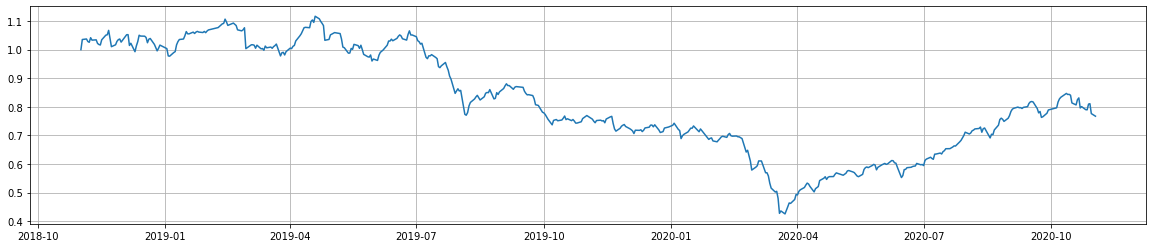

In [13]:
plt.plot(wdhs_ver1_yield_df["Date"], wdhs_ver1_yield_df["sum_money"]/wdhs_ver1_yield_df.iloc[0,1])	# line 그래프를 그립니다
plt.rcParams["figure.figsize"] = (20,4)
plt.rcParams['axes.grid'] = True
plt.show()	# 그래프를 화면에 보여줍니다

In [17]:
kospi_wdhs_ver1_df = pd.merge(kospi_df, wdhs_ver1_yield_df, left_on='Date', right_on='Date', how='left')
kospi_wdhs_ver1_df = kospi_wdhs_ver1_df.fillna(method='ffill')
kospi_wdhs_ver1_df = kospi_wdhs_ver1_df.drop(len(kospi_wdhs_ver1_df)-1)
kospi_wdhs_ver1_df

,Date,KOSPI,sum_money
0,2018-11-01,2024.46,1.000000e+07
1,2018-11-02,2096.00,1.035324e+07
2,2018-11-05,2076.92,1.037217e+07
3,2018-11-06,2089.62,1.028397e+07
4,2018-11-07,2078.69,1.025585e+07
...,...,...,...
488,2020-10-26,2343.91,7.900174e+06
489,2020-10-27,2330.84,7.895814e+06
490,2020-10-28,2345.26,8.095869e+06
491,2020-10-29,2326.67,8.108538e+06


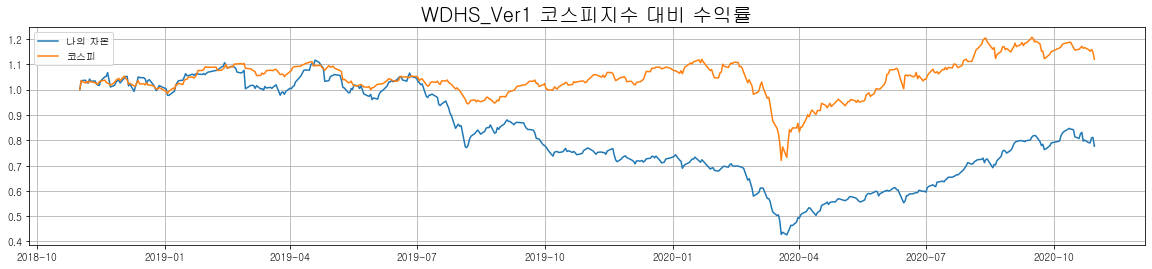

In [62]:
plt.plot(kospi_wdhs_ver1_df["Date"], kospi_wdhs_ver1_df["sum_money"]/kospi_wdhs_ver1_df.iloc[0,2], label = '나의 자본')	# line 그래프를 그립니다
plt.plot(kospi_wdhs_ver1_df["Date"], kospi_wdhs_ver1_df["KOSPI"]/kospi_wdhs_ver1_df.iloc[0,1], label = '코스피')	# line 그래프를 그립니다
#font 설정
plt.rc('font',family=font_name)
plt.rcParams["figure.figsize"] = (20,4)
plt.rcParams['axes.grid'] = True
plt.legend(loc = 'best')
plt.title('WDHS_Ver1 코스피지수 대비 수익률', fontsize=20)
plt.show()	# 그래프를 화면에 보여줍니다

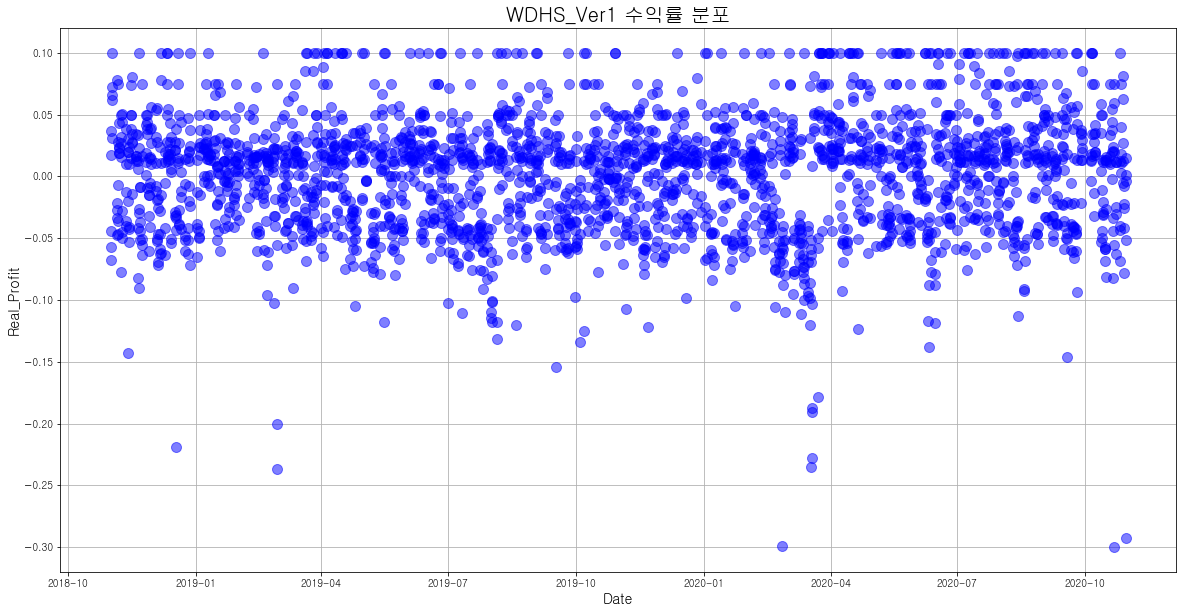

In [57]:
plt.plot('Date',  # x
         'real_profit',  # y
         data=wdhs_ver1_winlose_test, 
         linestyle='none', 
         marker='o', 
         markersize=10,
         color='blue', 
         alpha=0.5)
plt.rc('font', family=font_name)
plt.title('WDHS_Ver1 수익률 분포', fontsize=20)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Real_Profit', fontsize=14)
plt.show()

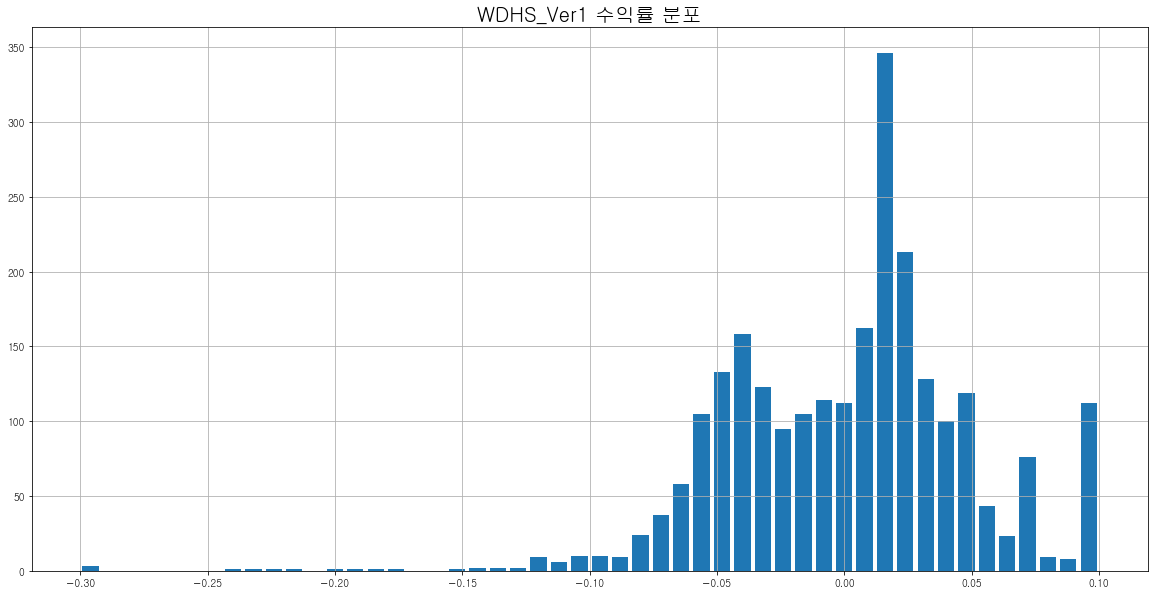

In [58]:
plt.hist(wdhs_ver1_winlose_test["real_profit"], rwidth = 0.8, bins = 50)
plt.rcParams["figure.figsize"] = (20,10)
plt.rc('font',family=font_name)
plt.title('WDHS_Ver1 수익률 분포', fontsize=20)
plt.show()